In [32]:
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Read CSV file with space delimiter
df = pd.read_excel('/content/drive/MyDrive/Major Project/Data/Final_data.xlsx')

# Print the first 5 rows of the data frame
display(df)

Output hidden; open in https://colab.research.google.com to view.

In [33]:
df['Origin Time'] = df['Origin Time'].str.replace(r'\s*IST$', '', regex=True)

In [34]:
display(df)

Output hidden; open in https://colab.research.google.com to view.

In [35]:
new_column_names = ["Index", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude(ergs)", "Magnitude_Type", "Location"]

df.columns = new_column_names
display(df)

Output hidden; open in https://colab.research.google.com to view.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            10656 non-null  object 
 1   Latitude(deg)    10656 non-null  float64
 2   Longitude(deg)   10656 non-null  float64
 3   Depth(km)        10656 non-null  int64  
 4   Magnitude(ergs)  10656 non-null  float64
 5   Magnitude_Type   10656 non-null  object 
 6   Location         10656 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 582.9+ KB


In [37]:
from sklearn.model_selection import train_test_split

# Select relevant columns
X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)']]
y = df['Magnitude(ergs)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

LINEAR REGRESSION

In [38]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

PREDICT FOR TESTING DATA

In [39]:
from sklearn.metrics import r2_score, mean_squared_error

scores= {"Model name": ["Linear regression", "SVM", "Random Forest"], "mse": [], "R^2": []}

# Predict on the testing set
y_pred = regressor.predict(X_test)

# Compute R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print("R^2: {:.2f}, MSE: {:.2f}".format(r2, mse))

R^2: 0.09, MSE: 0.53


PREDICT FOR NEW DATA

In [40]:
# Predict on new data
new_data = [[28.6139, 77.2090, 16.17], [11.6670, 92.7354, 8.05]]
#New Delhi and Andaman Islands
new_pred = regressor.predict(new_data)
print("New predictions:", new_pred)

New predictions: [3.72995885 3.92532781]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


PLOT LR MODEL

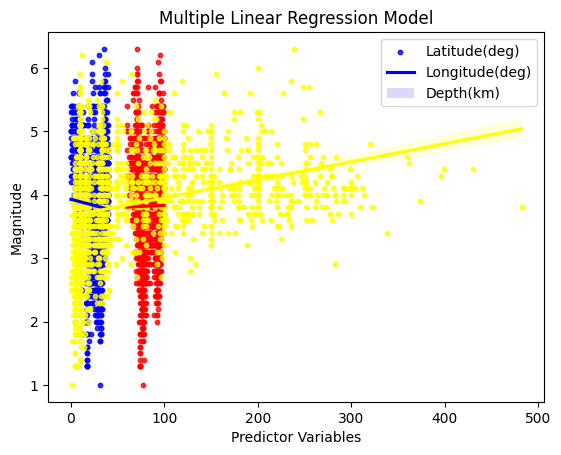

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the regression line
sns.regplot(x=X_test['Latitude(deg)'], y=y_test, color='blue', scatter_kws={'s': 10})
sns.regplot(x=X_test['Longitude(deg)'], y=y_test, color='red', scatter_kws={'s': 10})
sns.regplot(x=X_test['Depth(km)'], y=y_test, color='yellow', scatter_kws={'s': 10})
plt.legend(labels=['Latitude(deg)', 'Longitude(deg)', 'Depth(km)'])
plt.xlabel('Predictor Variables')
plt.ylabel('Magnitude')
plt.title('Multiple Linear Regression Model')
plt.show()

Support Vector Machine

In [42]:
from sklearn.svm import SVR

# Select a subset of the training data
subset_size = 500
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Create an SVM model
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the SVM model on the subset of data
svm.fit(X_train_subset, y_train_subset)

# Evaluate the model on the test set
score = svm.score(X_test, y_test)
print("Test score:", score)

Test score: -1.3572874026382045


Predict the testing data

In [43]:
# Predict on the testing set
y_pred_svm = svm.predict(X_test)

# Compute R^2 and MSE
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

scores['mse'].append(mse_svm)
scores['R^2'].append(r2_svm)

print("SVM R^2: {:.2f}, MSE: {:.2f}".format(r2_svm, mse_svm))

SVM R^2: -1.36, MSE: 1.39


Predict for new data

In [44]:
# Predict on new data
new_pred_svm = svm.predict(new_data)
print("New SVM predictions:", new_pred_svm)

New SVM predictions: [2.32518183 3.88695031]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Plot Model

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.svm import SVC

style.use('fivethirtyeight')

# create mesh grids
def make_meshgrid(x, y, h =.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# plot the contours
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# color = ['y', 'b', 'g', 'k']

subset_size = 500

# modify the column names based on the dataset
features = df[['Magnitude(ergs)','Latitude(deg)']][:subset_size].values
classes = df['Magnitude_Type'][:subset_size].values

# Initialize SVMs for each class
svm_ml = SVC(kernel='rbf')
svm_mc = SVC(kernel='rbf')
svm_ms = SVC(kernel='rbf')
svm_mw = SVC(kernel='rbf')
svm_mb = SVC(kernel='rbf')

# Fit each SVM for the specific class label
svm_ml.fit(features, (classes == 'ML').astype(int))
svm_mc.fit(features, (classes == 'MC').astype(int))
svm_ms.fit(features, (classes == 'MS').astype(int))
svm_mw.fit(features, (classes == 'MW').astype(int))
svm_mb.fit(features, (classes == 'Mb').astype(int))

fig, ax = plt.subplots()
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)

# plot the contours

color = ['y', 'b', 'g', 'k', 'm']


# Scatter plot for each class
for i in range(subset_size):
    if classes[i] == 'ML':
        plt.scatter(features[i][0], features[i][1], s=20, c=colors[0], label='ML')
    elif classes[i] == 'MC':
        plt.scatter(features[i][0], features[i][1], s=20, c=colors[1], label='MC')
    elif classes[i] == 'MS':
        plt.scatter(features[i][0], features[i][1], s=20, c=colors[2], label='MS')
    elif classes[i] == 'MW':
        plt.scatter(features[i][0], features[i][1], s=20, c=colors[3], label='MW')
    elif classes[i] == 'Mb':
        plt.scatter(features[i][0], features[i][1], s=20, c=colors[4], label='Mb')

plt.legend()
plt.show()


ValueError: The number of classes has to be greater than one; got 1 class

Unique classes in subset: ['MB' 'ML' 'MS' 'MW' 'Mb']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

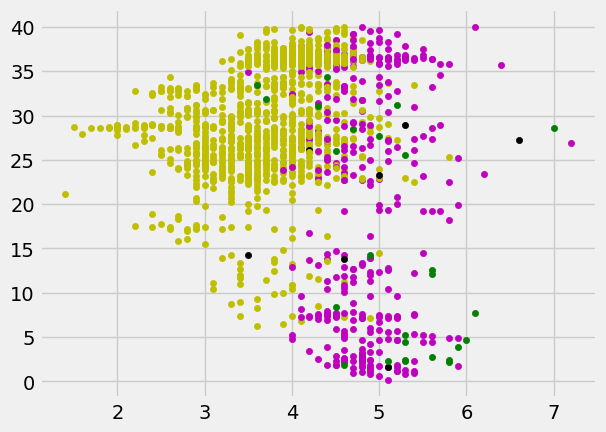

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.svm import SVC

style.use('fivethirtyeight')

# create mesh grids
def make_meshgrid(x, y, h =.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# plot the contours
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# color = ['y', 'b', 'g', 'k']

#updated subset_size
subset_size = 1500

# modify the column names based on the dataset
features = df[['Magnitude(ergs)','Latitude(deg)']][:subset_size].values
classes = df['Magnitude_Type'][:subset_size].values

# Initialize SVMs for each class
svm_ml = SVC(kernel='rbf')
svm_mc = SVC(kernel='rbf')
svm_ms = SVC(kernel='rbf')
svm_mw = SVC(kernel='rbf')
svm_mb = SVC(kernel='rbf')

# Check for class representation before fitting
unique_classes = np.unique(classes)
print("Unique classes in subset:", unique_classes)

# Fit each SVM for the specific class label, handling cases with insufficient classes
for svm, class_label in zip([svm_ml, svm_mc, svm_ms, svm_mw, svm_mb], ['ML', 'MC', 'MS', 'MW', 'Mb']):
    if class_label in unique_classes:
        svm.fit(features, (classes == class_label).astype(int))
    else:
        print(f"Warning: Class '{class_label}' not found in the subset. Skipping SVM fitting for this class.")


fig, ax = plt.subplots()
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)

# plot the contours

colors = ['y', 'b', 'g', 'k', 'm']  # Define colors for each class


# Scatter plot for each class
for i in range(subset_size):
    if classes[i] == 'ML':
        plt.scatter(features[i][0], features[i][1], s=20, c=colors[0], label='ML')
    elif classes[i] == 'MC':
        plt.scatter(features[i][0], features[i][1], s=20, c=colors[1], label='MC')
    elif classes[i] == 'MS':
        plt.scatter(features[i][0], features[i][1], s=20, c=colors[2], label='MS')
    elif classes[i] == 'MW':
        plt.scatter(features[i][0], features[i][1], s=20, c=colors[3], label='MW')
    elif classes[i] == 'Mb':
        plt.scatter(features[i][0], features[i][1], s=20, c=colors[4], label='Mb')

plt

In [50]:
print(df.columns)
df['Magnitude_Type'].unique()

Index(['Index', 'Latitude(deg)', 'Longitude(deg)', 'Depth(km)',
       'Magnitude(ergs)', 'Magnitude_Type', 'Location'],
      dtype='object')


array(['ML', 'Mb', 'MS', 'MW', 'MB', 'MC'], dtype=object)

NAIVE BAYES

In [55]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/drive/MyDrive/Major Project/Data/Final_data.xlsx')

df['Origin Time'] = df['Origin Time'].str.replace(r'\s*IST$', '', regex=True)

new_column_names = ["Index", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude(ergs)", "Magnitude_Type", "Location"]

df.columns = new_column_names

# Convert magnitude column to categorical data
df['Magnitude_Category'] = pd.cut(df['Magnitude(ergs)'], bins=[0, 5, 6, 7, np.inf], labels=['Minor', 'Moderate', 'Strong', 'Major'])

# Encode Magnitude Category
le = LabelEncoder()
df['Magnitude_Category_Encoded'] = le.fit_transform(df['Magnitude_Category'])

# Normalize latitude and longitude values
scaler = MinMaxScaler()
df[['Latitude(deg)', 'Longitude(deg)']] = scaler.fit_transform(df[['Latitude(deg)', 'Longitude(deg)']])

# Select features
X = df[['Latitude(deg)', 'Longitude(deg)']]
y = df['Magnitude_Category_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Gaussian Naive Bayes model on the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

TESTING


In [56]:
# Use the trained model to make predictions on the testing data
y_pred = gnb.predict(X_test)

ACCURACY


In [57]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate and print the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

cr = classification_report(y_test, y_pred, labels=[0, 1, 2, 3], target_names=['Minor', 'Moderate', 'Strong', 'Major'])
print('Classification Report:\n', cr)

Accuracy: 0.9340006255864873
Confusion Matrix:
 [[2959   68    0]
 [ 135   27    0]
 [   8    0    0]]
Classification Report:
               precision    recall  f1-score   support

       Minor       0.00      0.00      0.00         0
    Moderate       0.95      0.98      0.97      3027
      Strong       0.28      0.17      0.21       162
       Major       0.00      0.00      0.00         8

    accuracy                           0.93      3197
   macro avg       0.31      0.29      0.29      3197
weighted avg       0.92      0.93      0.92      3197



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

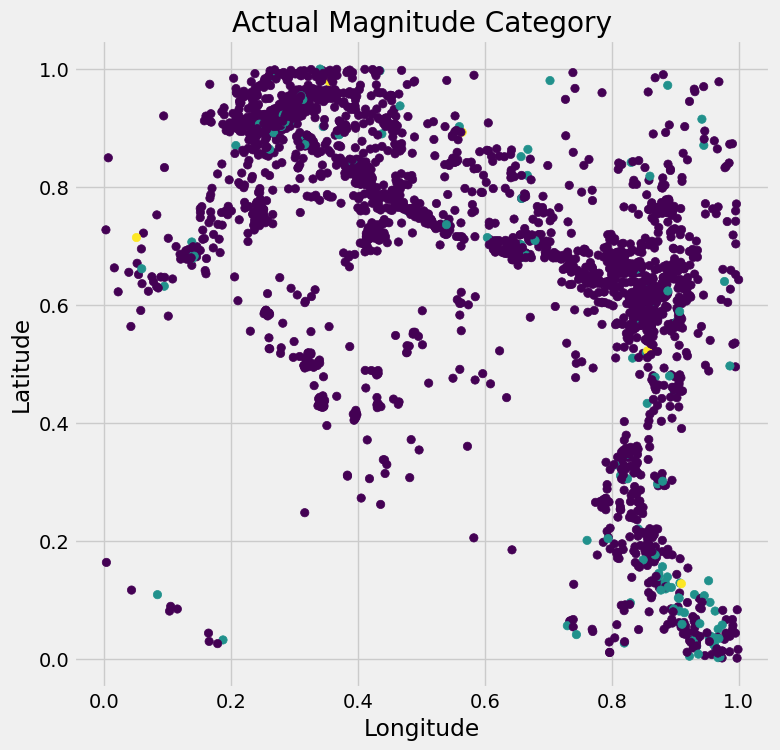

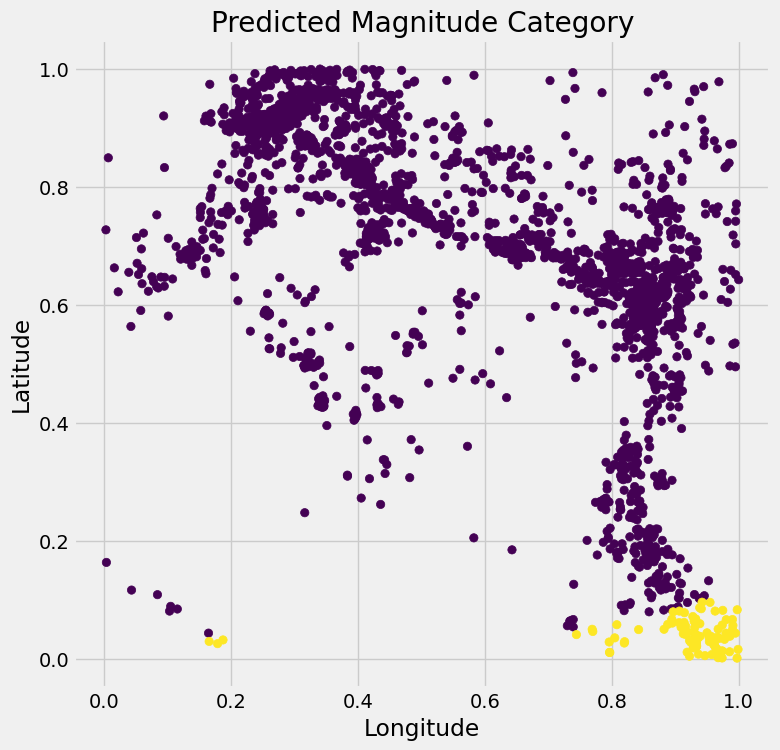

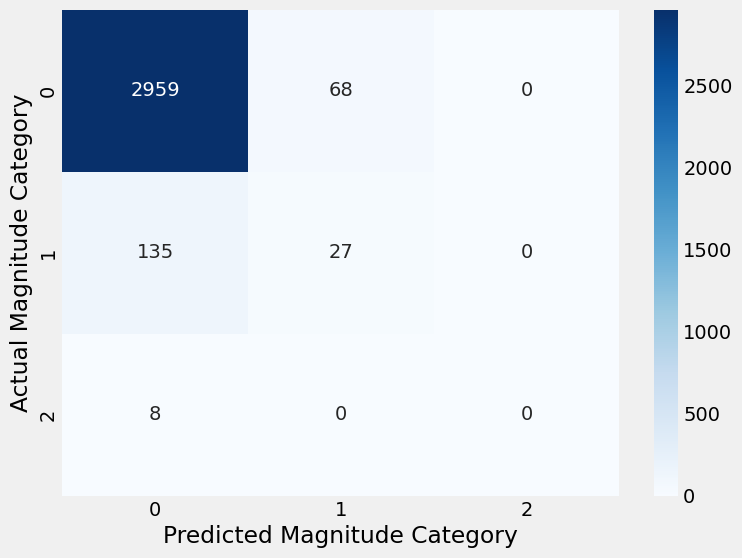

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

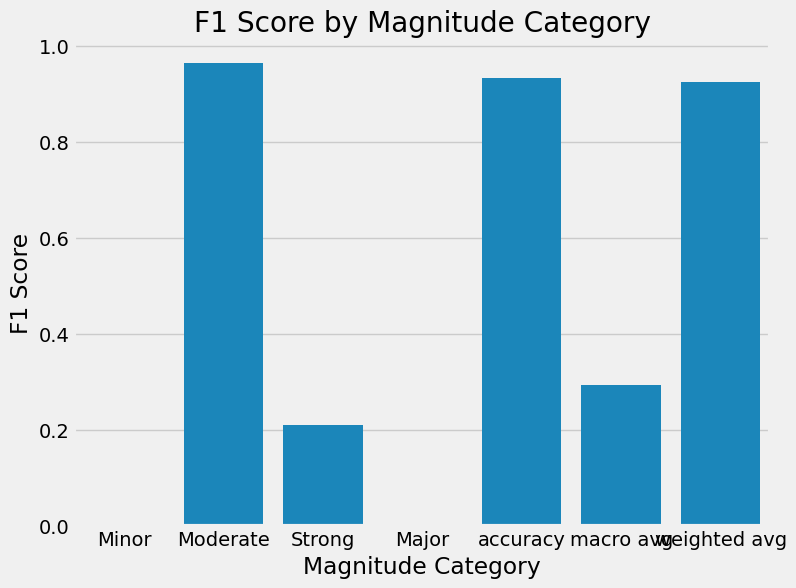

In [58]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Longitude(deg)'], X_test['Latitude(deg)'], c=y_test, cmap='viridis')
plt.title('Actual Magnitude Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
print(" ")
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Longitude(deg)'], X_test['Latitude(deg)'], c=y_pred, cmap='viridis')
plt.title('Predicted Magnitude Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
print(" ")


# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Magnitude Category')
plt.ylabel('Actual Magnitude Category')
plt.show()
print(" ")

cr = classification_report(y_test, y_pred, labels=[0, 1, 2, 3], target_names=['Minor', 'Moderate', 'Strong', 'Major'], output_dict=True)
# Convert classification report dictionary to DataFrame
cr_df = pd.DataFrame(cr).transpose()

# Create bar plot of classification report scores
plt.figure(figsize=(8, 6))
sns.barplot(x=cr_df.index, y=cr_df['f1-score'])
plt.xlabel('Magnitude Category')
plt.ylabel('F1 Score')
plt.title('F1 Score by Magnitude Category')
plt.show()
print(" ")